# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
# Your code here. 
#We first create our dataset 
student_data = pd.DataFrame({"StudentID": [1,2,3,4,5,6,7,8,9,10],"Age":[17,51,27,21,36,48,19,26,54,30], "Tardies": [10,1,5,9,4,2,9,6,0,3]}).set_index("StudentID")
student_data

,Age,Tardies
StudentID,,
1,17,10
2,51,1
3,27,5
4,21,9
5,36,4
6,48,2
7,19,9
8,26,6
9,54,0


Draw a dispersion diagram (scatter plot) for the data.

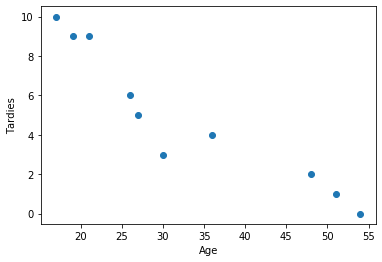

In [3]:
# Your code here.
plt.scatter(x=student_data['Age'],y=student_data['Tardies'])
plt.xlabel("Age")
plt.ylabel("Tardies")
plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [4]:
# Your response here. 
print("Yes. The initial hypotheses seems to be correct. The number or tardies seems to decrease when the age goes up.")

Yes. The initial hypotheses seems to be correct. The number or tardies seems to decrease when the age goes up.


Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [5]:
# Your response here.
covariance = student_data[['Age', 'Tardies']].cov()
correlation = student_data[['Age', 'Tardies']].corr()
print("Covariance:\n",covariance)
print("\nCorrelation:\n",correlation)

print("\n\nThe difference is, covariance giveus the direction (positive or negative) between the variables and correlation give us this plus the strenght of this")

Covariance:
                 Age    Tardies
Age      187.655556 -45.566667
Tardies  -45.566667  12.544444

Correlation:
               Age   Tardies
Age      1.000000 -0.939163
Tardies -0.939163  1.000000


The difference is, covariance giveus the direction (positive or negative) between the variables and correlation give us this plus the strenght of this


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [6]:
# Your response here.
#Define our model in the variable model
model = LinearRegression()
#Define the X and Y variable and reshape them
X = student_data['Age'].values.reshape(-1,1)
Y = student_data['Tardies'].values.reshape(-1,1)
#Fitting the model
model.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
#Define my predictions and add them to the dataset as a new column
predictions = model.predict(X)

#Adding the column and visualizing the data
student_data['Predictions'] = predictions
student_data

,Age,Tardies,Predictions
StudentID,,,
1,17,10,8.760850
2,51,1,0.504944
3,27,5,6.332643
4,21,9,7.789567
5,36,4,4.147256
6,48,2,1.233406
7,19,9,8.275209
8,26,6,6.575463
9,54,0,-0.223518


In [8]:
score = model.score(X,Y)
print("R2:",score)

#How to interpret this score: (source: https://bit.ly/2XTwznm)

'''An R2 of 0 means that the dependent variable cannot be predicted from the independent variable.

An R2 of 1 means the dependent variable can be predicted without error from the independent variable.

An R2 between 0 and 1 indicates the extent to which the dependent variable is predictable. 
'''



R2: 0.8820265558250109


'An R2 of 0 means that the dependent variable cannot be predicted from the independent variable.\n\nAn R2 of 1 means the dependent variable can be predicted without error from the independent variable.\n\nAn R2 between 0 and 1 indicates the extent to which the dependent variable is predictable. \n'

Plot your regression model on your scatter plot.

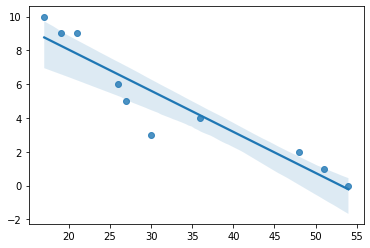

In [9]:
# Your code here.
sns.regplot(X,Y)

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [ ]:
print("Based on the R2 value, our data is highly predictable")

In [ ]:



#Bonus: Calculating predictions and residuals:

intercept = model.intercept_
slope = model.coef_
print("The intercept is: ",intercept)
print("\nThe slope is: ",slope)
predictions = [intercept + slope*x for x in student_data['Age']]
residuals = [student_data['Tardies'][i] - predictions[i] for i in range(1, len(student_data['Tardies']))]
RMSE = np.sqrt((np.mean([residual**2 for residual in residuals])))
print("\nRMSE:",RMSE)
print("\nAs stated before on the initial analysis the Age seems to be a factor of influence in the tardiness level.")
print("This hypotheses is also backed up by the data shown above. So in short, we can say that age is a good predictor.")

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [ ]:
# Import any libraries you may need & the data
vehicles = pd.read_csv('vehicles.csv')
vehicles.head()

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [ ]:
# Your response here. 
correlations = vehicles[['Year','Cylinders' ,'Fuel Barrels/Year','Combined MPG','Fuel Cost/Year','CO2 Emission Grams/Mile']].corr()
correlations

In [ ]:
print("I think the most relevant correlation will be, the Fuel consumption, more especifically the Fuel Barrels/Year")
print("The least relevant correlation is the year of production")

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [ ]:
# Your response here. 
import statsmodels.api as sm
vehicles_Y = vehicles['CO2 Emission Grams/Mile']
vehicles_X = vehicles[['Year','Cylinders' ,'Fuel Barrels/Year','Combined MPG','Fuel Cost/Year']]
model_vehicles = sm.OLS(vehicles_Y,vehicles_X)
results = model_vehicles.fit()

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [ ]:
# Your response here. 
results.summary()

In [ ]:
print("The adjusted R-squared value is quite high which means that the results are quite realibale")
print("The coeficients tells us that the most influent field is Fuel Barrels/Year with a big confidence level as well")
print("All in all this model is quite realible and I trust the result it has presented.")

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [ ]:
# Your code here. 
party_data = pd.DataFrame({"X": [1,3,4,6,8,9,11,14], "Y": [1,2,4,4,5,7,8,13]})
party_data

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [ ]:
# Your code here.
#We set our model to use (linear regression)
party_model = LinearRegression()
#Reshaping the arrays to fit them into the model
party_X = party_data['X'].values.reshape(-1,1)
party_Y = party_data['Y'].values.reshape(-1,1)
#Fitting the model
party_model.fit(party_X, party_Y)
sns.regplot(party_X,party_Y)
party_intercept = party_model.intercept_[0]
party_slope = party_model.coef_[0][0]

party_predictions = [party_intercept + party_slope*x for x in party_data['X']]
party_residuals = [party_data['Y'][i] - party_predictions[i] for i in range(len(party_data['Y']))]
party_RMSE = np.sqrt((np.mean([residual**2 for residual in party_residuals])))
print("RMSE:", party_RMSE)

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [ ]:
# Your response here. 
print("Intercept:", party_intercept)
print("Slope:", party_slope)
print("It seems that there is a relation between the number of invites and the number of people attending. Which I guess it's logical conclusion with the data we have")

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [ ]:
# Your response here. 
print("I do see some outliers but with such a small dataset I guess that's expected.")
new_party = party_data.drop([2,7]).reset_index()
new_party_model = LinearRegression()
new_party_X = new_party['X'].values.reshape(-1,1)
new_party_Y = new_party['Y'].values.reshape(-1,1)
new_party_model.fit(new_party_X, new_party_Y)
sns.regplot(new_party_X,new_party_Y)
new_party_intercept = new_party_model.intercept_[0]
new_party_slope = new_party_model.coef_[0][0]
print("Intercept:", new_party_intercept)
print("Slope:", new_party_slope)
new_party_predictions = [new_party_intercept + new_party_slope*x for x in new_party['X']]
new_party_residuals = [new_party['Y'][i] - new_party_predictions[i] for i in range(len(new_party['Y']))]
new_party_RMSE = np.sqrt((np.mean([residual**2 for residual in new_party_residuals])))
print("RMSE:", new_party_RMSE)

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 
print("The slope of the regression changed a little bit, from 0.848 to 0.715. This means that the results are not as easy to predict as before")
print("Also he have new outliers now which weren't there on the previous graph.")
print("The Root Mean Squared Error also went down quite a bit from 0.933 to 0.415")